In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

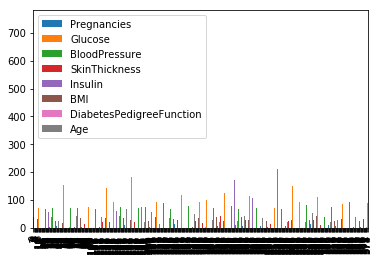

In [2]:
df1=pd.read_csv('Diabetes_XTrain.csv')
df1.plot.bar()
plt.show()

In [4]:
xx=df1.values
list=[]
for i in range(xx.shape[1]):
    x1=xx[:,i].mean()
    list.append(x1)
list

[3.7586805555555554,
 119.97569444444444,
 68.82638888888889,
 20.364583333333332,
 76.16666666666667,
 31.857291666666665,
 0.48151909722222225,
 32.954861111111114]

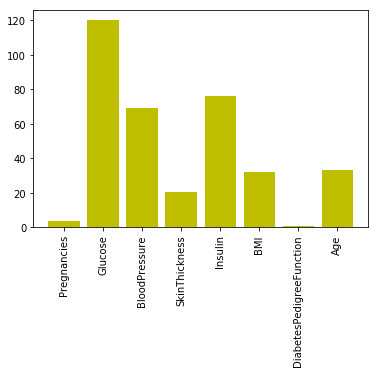

In [5]:
x=df1
plt.bar([1,2,3,4,5,6,7,8],list,tick_label=x.columns,color='y',width=0.8)
plt.xticks(rotation='vertical')
#plt.xlabel(x[0])
plt.show()

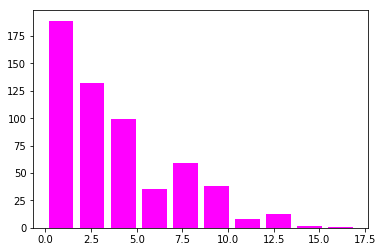

In [6]:
plt.hist(x['Pregnancies'],rwidth=0.8,color='magenta')
plt.show()

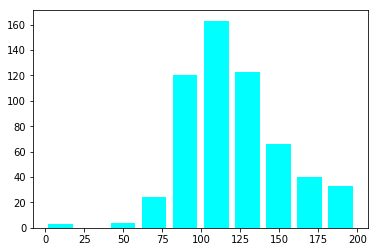

In [7]:
plt.hist(x['Glucose'],rwidth=0.8,color='cyan')
plt.show()

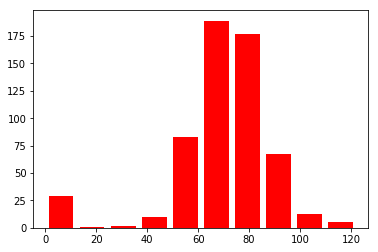

In [8]:
plt.hist(x['BloodPressure'],rwidth=0.8,color='red')
plt.show()

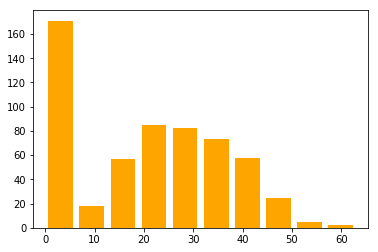

In [9]:
plt.hist(x['SkinThickness'],rwidth=0.8,color='orange')
plt.show()

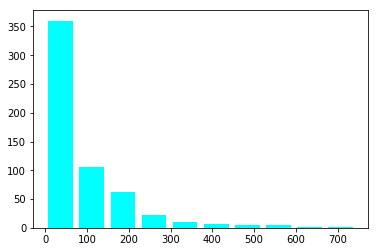

In [10]:
plt.hist(x['Insulin'],rwidth=0.8,color='cyan')
plt.show()

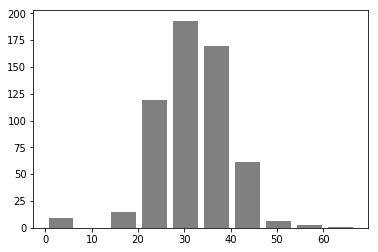

In [11]:
plt.hist(x['BMI'],rwidth=0.8,color='gray')
plt.show()

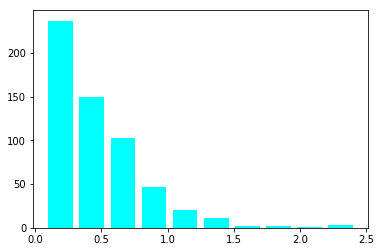

In [12]:
plt.hist(x['DiabetesPedigreeFunction'],rwidth=0.8,color='cyan')
plt.show()

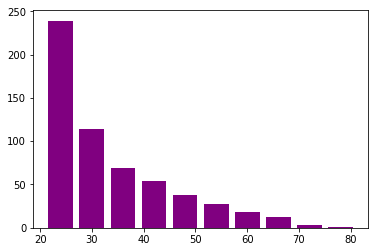

In [13]:
plt.hist(x['Age'],rwidth=0.8,color='purple')
plt.show()

In [14]:
x=df1.values

In [15]:
x

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [16]:
x.shape

(576, 8)

In [17]:
df2=pd.read_csv('Diabetes_YTrain.csv')

In [18]:
df3=pd.read_csv('Diabetes_XTest.csv')
xtest=df3.values

In [19]:
y=df2.values
y=y.reshape(-1)

In [20]:
y.shape

(576,)

In [21]:
#knn

In [22]:
def distance(v1,v2):
    return(np.sqrt(sum((v1-v2)**2)))

In [23]:
def knn(x,y,pt,k=5):
    dist=[]
    for i in range(x.shape[0]):
        d=distance(pt,x[i])
        dist.append((d,int(y[i])))
    dist=sorted(dist,key=lambda x:x[0])[:k]
    #rint(dist)
    dist=np.asarray(dist,dtype=np.int64)
    new_vals=np.unique(dist[:,1],return_counts=True)
    print(new_vals)
    index=new_vals[1].argmax()
    return new_vals[0][index]

In [24]:
res=knn(x,y,x[24])
res

(array([0, 1], dtype=int64), array([4, 1], dtype=int64))


0

In [25]:
for i in range(x.shape[0]):
    res=knn(x,y,x[i])
    

(array([0, 1], dtype=int64), array([1, 4], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0, 1], dtype=int64), array([3, 2], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0, 1], dtype=int64), array([1, 4], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([3, 2], dtype=int64))
(array([1], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0, 1], dtype=int64), array([3, 2], dtype=int64))
(array([0, 1], dtype=int64), array([3, 2], dtype=int64))
(arr

In [26]:
arr=np.zeros(1,dtype=np.int64)
heading=['Outcome']
with open('C:\\Users\\Siddharth\\Documents\\'+'Predicted_YTest_values.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(heading)
        for i in range(xtest.shape[0]):
            res=knn(x,y,xtest[i])
            arr[0]=res
            writer.writerow(arr)

(array([0, 1], dtype=int64), array([2, 3], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([2, 3], dtype=int64))
(array([0, 1], dtype=int64), array([1, 4], dtype=int64))
(array([0, 1], dtype=int64), array([2, 3], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([2, 3], dtype=int64))
(array([1], dtype=int64), array([5], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([1], dtype=int64), array([5], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([3, 2], dtype=int64))
(array([0], dtype=int64), array([5], dtype=int64))
(array([0, 1], dtype=int64), array([4, 1], dtype=int64))
(array([0, 1], dtype=int64), array([1, 4], dtype=int64))
(array([0, 1], dtype=int64),

In [27]:
arr=np.zeros(1,dtype=np.int64)
arr[0]

0

In [28]:
xtest.shape

(192, 8)